# Practical Application 1 — Coupon Acceptance

This notebook explores **which customers accept a driving coupon** using the UCI coupon dataset.
We use **pandas**, **NumPy**, and **visualizations** with **Matplotlib** (and Seaborn for convenience) to
contrast people who accepted vs. rejected coupons.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Load data
df = pd.read_csv("data/coupons.csv")

# Inspect
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [2]:
# Inspect data
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# Harmonize target column. In current data this is the last column, with name "Y"
target_col = "Y"
assert target_col is not None, "Could not find target column; please update the code to match your dataset."
df[target_col] = df[target_col].astype(int)
target_col

'Y'

In [4]:
# Basic summary
display(df[target_col].value_counts(dropna=False).rename({0:"Rejected (0)",1:"Accepted (1)"}))
print("Acceptance rate:", df[target_col].mean())
df.describe(include="all").T

,count
Y,
Accepted (1),7210
Rejected (0),5474


Acceptance rate: 0.5684326710816777


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
destination,12684,3,No Urgent Place,6283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passanger,12684,4,Alone,7305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,12684,3,Sunny,10069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,12684.0,NaN,NaN,NaN,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
time,12684,5,6PM,3230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupon,12684,5,Coffee House,3996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expiration,12684,2,1d,7091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,12684,2,Female,6511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,12684,8,21,2653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maritalStatus,12684,5,Married partner,5100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Create images directory if it doesn't exist
import os
if not os.path.exists("images"):
        os.makedirs("images")
sns.reset_defaults()
plt.style.use("default")

,accept_rate
coupon,
Carry out & Take away,0.735478
Restaurant(<20),0.707107
Coffee House,0.499249
Restaurant(20-50),0.441019
Bar,0.410015


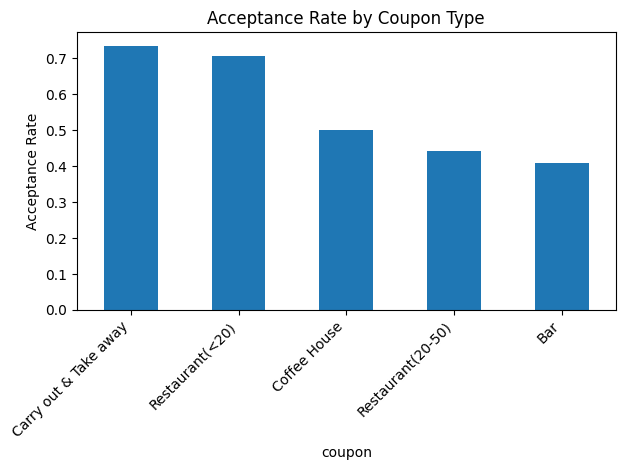

In [6]:
# Acceptance by coupon type

coupon_col = "coupon"

if coupon_col is not None:
    by_coupon = df.groupby(coupon_col)[target_col].mean().sort_values(ascending=False)
    display(by_coupon.to_frame("accept_rate"))

    # Matplotlib bar chart (one chart per figure; default colors only)
    plt.figure()
    # We'll keep the default colors here as it's a single series plot, not comparing by acceptance
    by_coupon.plot(kind="bar")
    plt.ylabel("Acceptance Rate")
    plt.title("Acceptance Rate by Coupon Type")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("images/acceptance_by_coupon_type.png")
    plt.show()
else:
    print("No coupon type column found.")


Acceptance by time


,accept_rate
time,
2PM,0.661523
10AM,0.608352
6PM,0.584520
10PM,0.508475
7AM,0.502212


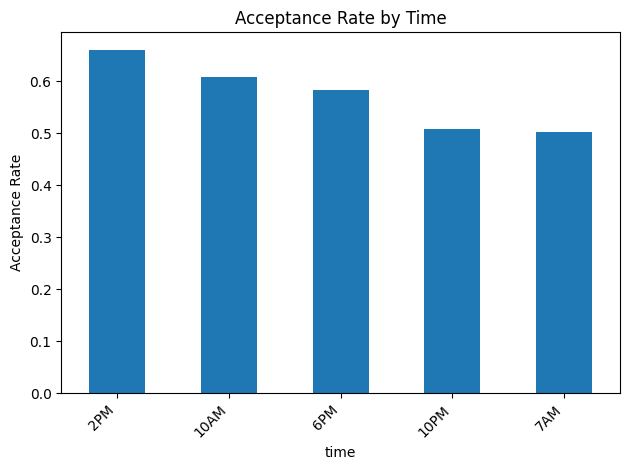


Acceptance by weather


,accept_rate
weather,
Sunny,0.594796
Snowy,0.470463
Rainy,0.462810


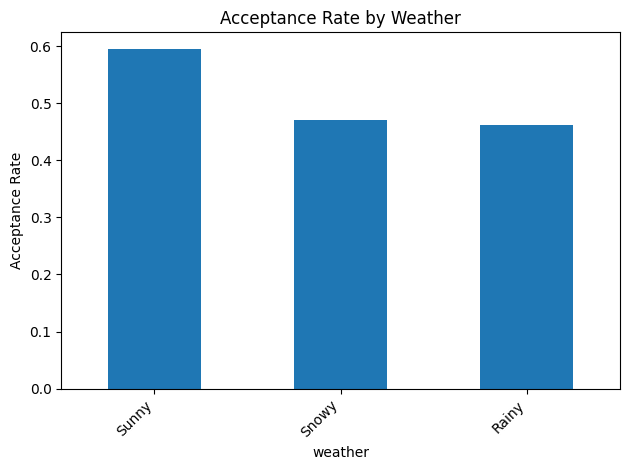


Acceptance by passanger


,accept_rate
passanger,
Friend(s),0.673438
Partner,0.595349
Alone,0.525804
Kid(s),0.504970


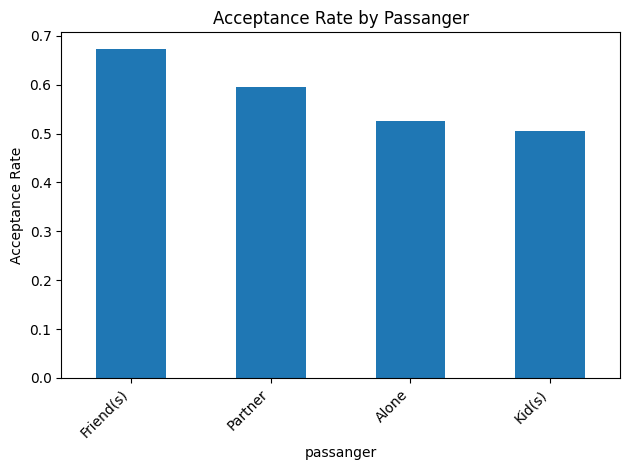


Acceptance by destination


,accept_rate
destination,
No Urgent Place,0.633774
Home,0.506333
Work,0.502212


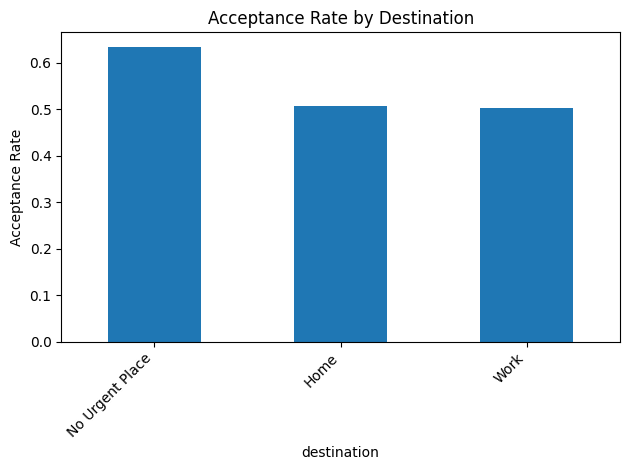


Acceptance by expiration


,accept_rate
expiration,
1d,0.625582
2h,0.495977


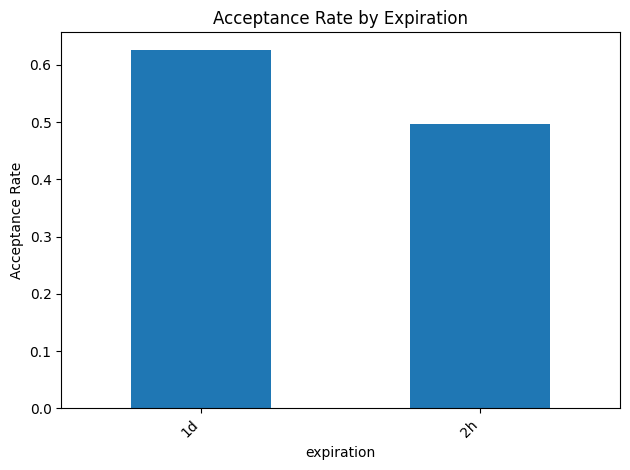

In [7]:
# Explore acceptance by context variables

candidates = ["time", "weather", "passanger", "destination", "expiration"]

for col in candidates:
    if col not in df.columns:
        continue

    print(f"\nAcceptance by {col}")
    g = df.groupby(col)[target_col].mean().sort_values(ascending=False)
    display(g.to_frame("accept_rate"))

    plt.figure()
    # We'll keep the default colors here as it's a single series plot, not comparing by acceptance
    g.plot(kind="bar")
    plt.ylabel("Acceptance Rate")
    plt.title(f"Acceptance Rate by {col.capitalize()}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    plt.savefig(f"images/acceptance_by_{col}.png")
    plt.show()

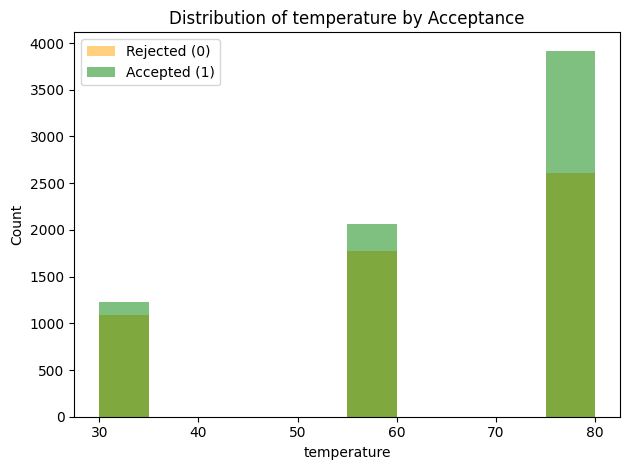

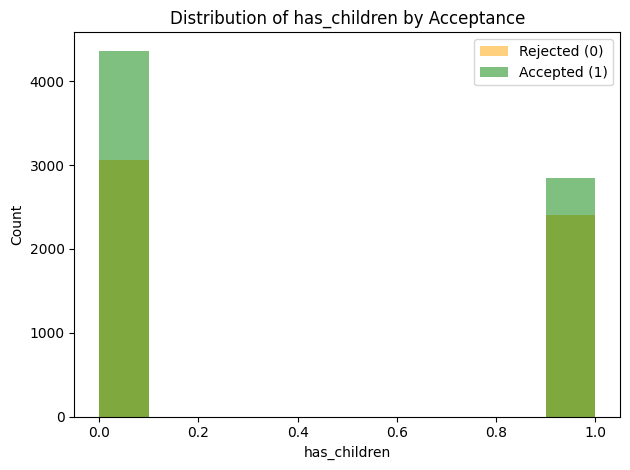

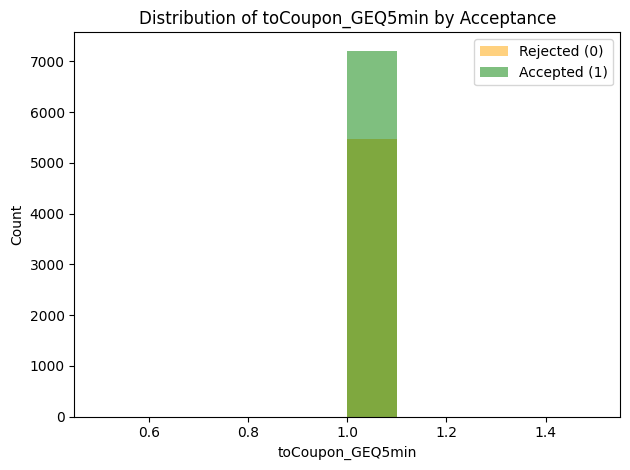

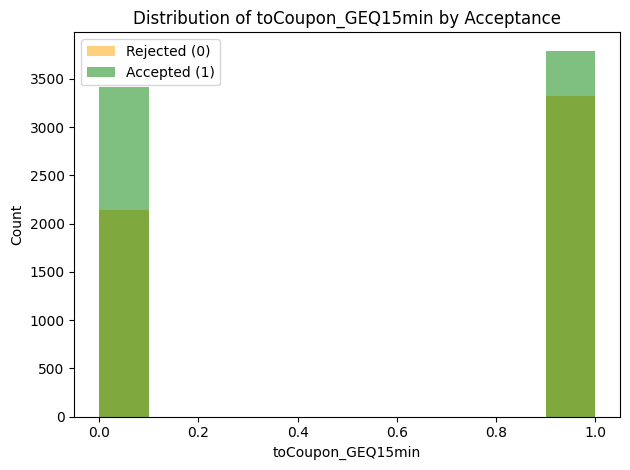

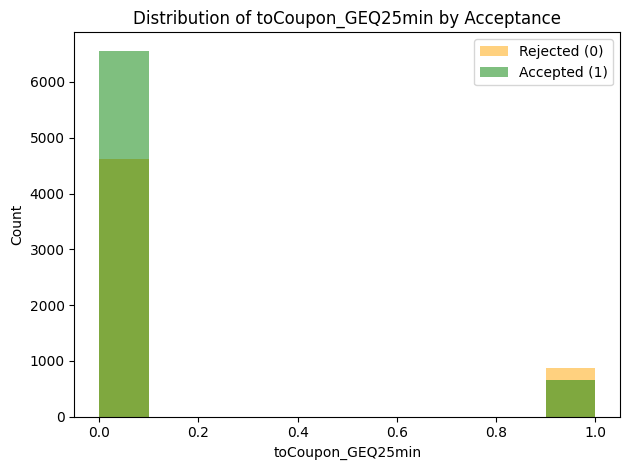

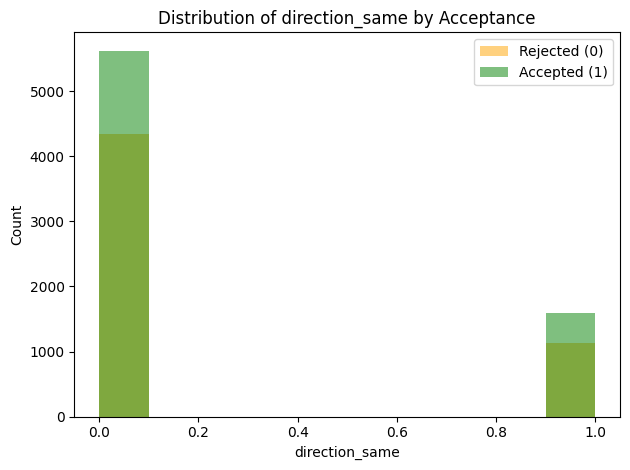

In [8]:
# Compare numerical distributions between accepted vs. rejected

num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != target_col]
for c in num_cols[:6]:  # limit to a handful
    plt.figure()
    # Using Matplotlib hist (not seaborn) as per constraints
    accepted = df[df[target_col]==1][c].dropna()
    rejected = df[df[target_col]==0][c].dropna()
    plt.hist(rejected, alpha=0.5, label="Rejected (0)", color='orange')
    plt.hist(accepted, alpha=0.5, label="Accepted (1)", color='green')
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.title(f"Distribution of {c} by Acceptance")
    plt.legend()
    plt.tight_layout()

    plt.savefig(f"images/distribution_of_{c}_by_acceptance.png")
    plt.show()

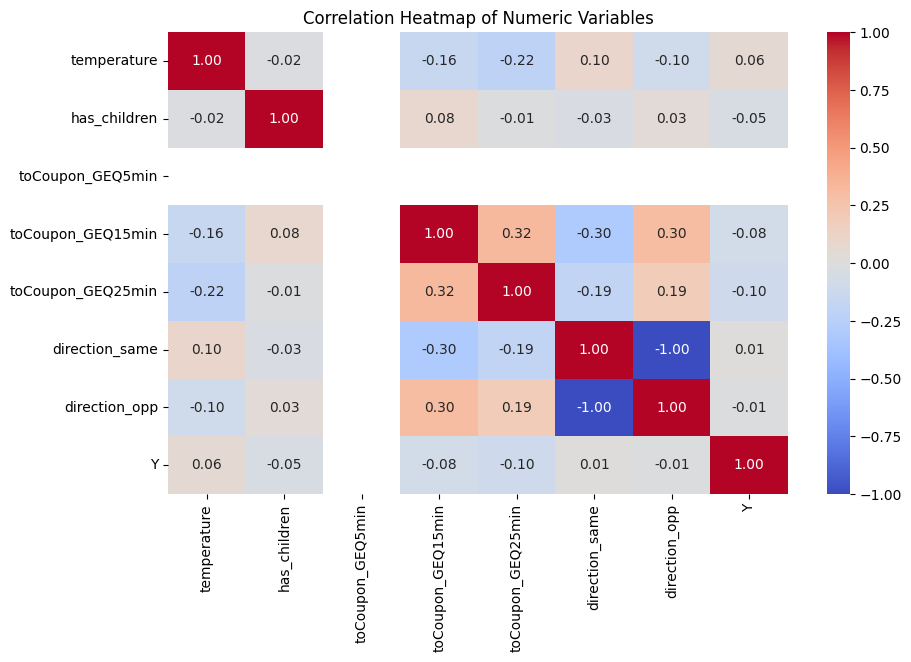

In [9]:
# Heatmap (correlation matrix): Show which numerical features correlate with coupon acceptance.
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Variables")
plt.savefig("images/correlation_heatmap.png")
plt.show()

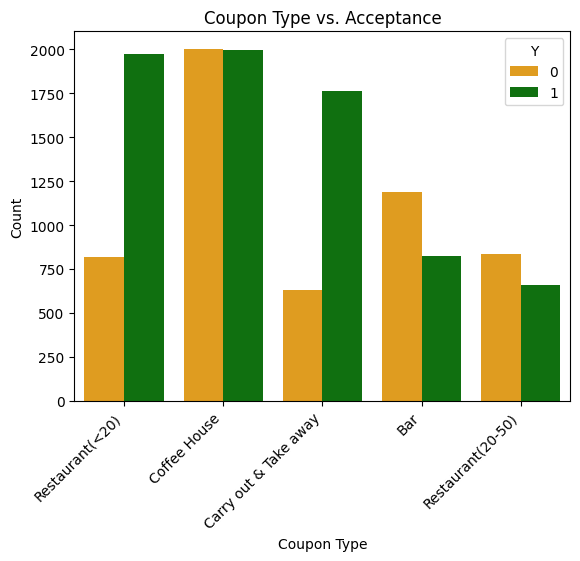

In [10]:
# Count Plot (with hue for acceptance): Compare how different groups behave.Acceptance rate by coupon type.
colors = {0: 'orange', 1: 'green'}
sns.countplot(x='coupon', hue=target_col, data=df, palette=colors)
plt.title("Coupon Type vs. Acceptance")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.savefig("images/coupon_type_vs_acceptance.png")
plt.show()

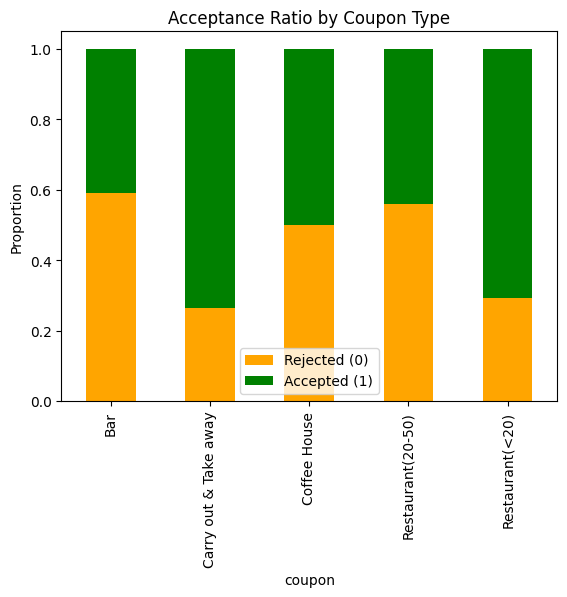

In [11]:
# Stacked Bar Chart: Show proportions (e.g., accepted vs rejected) within each category.
cross = pd.crosstab(df['coupon'], df[target_col], normalize='index')
colors = {0: 'orange', 1: 'green'}
cross.plot(kind='bar', stacked=True, color=[colors[0], colors[1]])
plt.title("Acceptance Ratio by Coupon Type")
plt.ylabel("Proportion")
plt.legend(["Rejected (0)", "Accepted (1)"])
plt.savefig("images/acceptance_ratio_by_coupon_type.png")
plt.show()

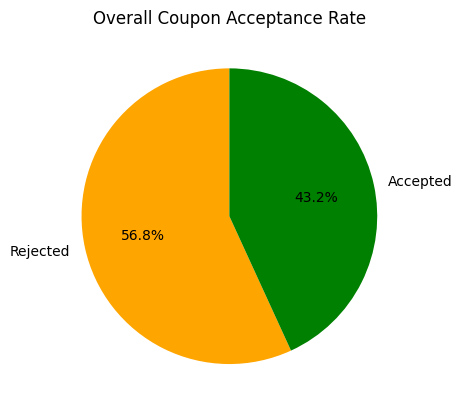

In [12]:
# Pie Chart: Quick snapshot of overall acceptance vs. rejection.

counts = df[target_col].value_counts()
colors = ['orange', 'green'] # Order is for Rejected (0), Accepted (1)
plt.pie(counts, labels=['Rejected','Accepted'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Overall Coupon Acceptance Rate")
plt.savefig("images/overall_acceptance_rate.png")
plt.show()

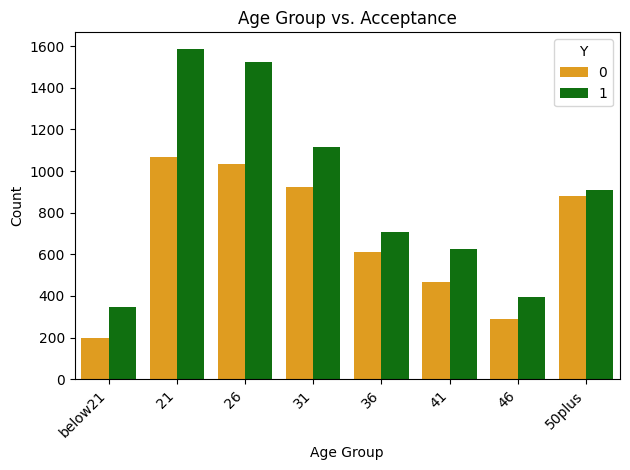

In [13]:
# Count Plot for Age Group vs. Acceptance
colors = {0: 'orange', 1: 'green'}
sns.countplot(x='age', hue=target_col, data=df, palette=colors, order=['below21', '21', '26', '31', '36', '41', '46', '50plus'])
plt.title("Age Group vs. Acceptance")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("images/age_group_vs_acceptance_countplot.png")
plt.show()

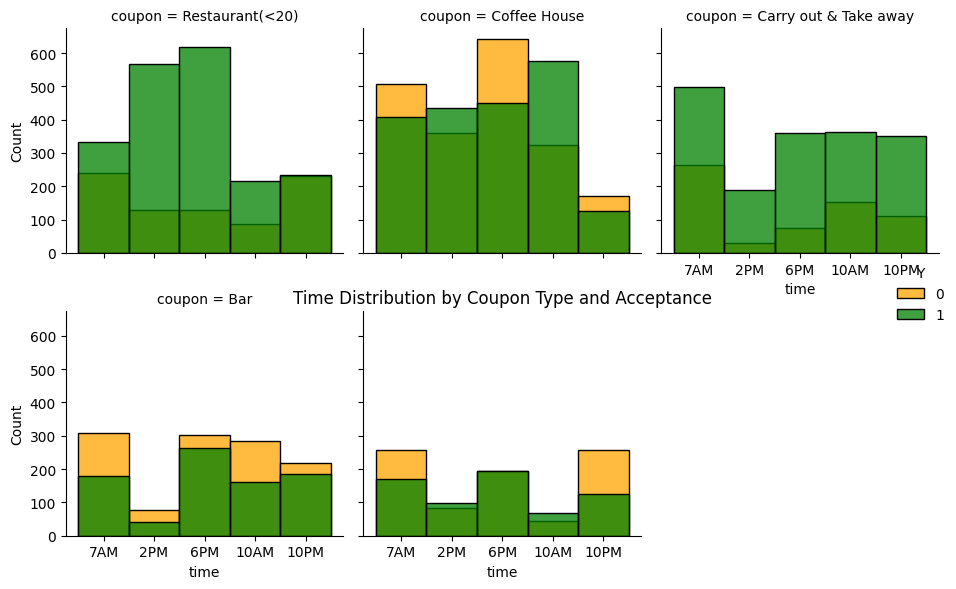

In [14]:
# FacetGrid (multi-plot comparison) : Combine multiple small plots to explore interactions.
colors = {0: 'orange', 1: 'green'}
g = sns.FacetGrid(df, col='coupon', hue=target_col, col_wrap=3, palette=colors)
g.map(sns.histplot, 'time', multiple='stack')
g.add_legend()
plt.title("Time Distribution by Coupon Type and Acceptance")
plt.tight_layout()
plt.savefig("images/time_distribution_by_coupon_type_and_acceptance.png")
plt.show()

## Findings & Recommendations

Based on the analysis:

- **Coupon Type Matters:** "Carry out & Take away" and "Restaurant(<20)" coupons have significantly higher acceptance rates compared to "Coffee House," "Restaurant(20-50)," and "Bar" coupons. Focus on promoting the higher-performing coupon types.
- **Context is Key:** Acceptance varies based on context variables:
    - **Time:** Coupons offered at 2 PM and 10 AM have higher acceptance rates.
    - **Weather:** Sunny weather correlates with higher acceptance.
    - **Passenger:** People with "Friend(s)" or "Partner" are more likely to accept coupons.
    - **Destination:** "No Urgent Place" destinations show higher acceptance.
    - **Expiration:** Coupons with a 1-day expiration are more likely to be accepted than those with a 2-hour expiration.

 ## Further study    
- **Tune Expiration Windows:** Consider offering coupons with longer expiration times (like 1 day) to increase acceptance.
- **Consider A/B Testing:** Personalize offers by combining coupon type and context (e.g., offer "Carry out & Take away" coupons to people with friends during sunny weather at 2 PM when they are going to "No Urgent Place").
- **Numerical Distributions:** Examine the distributions of numerical features like temperature and distance to coupon to understand if they differ between accepted and rejected groups, which could inform further targeting strategies.